# -----------------------------------------------------------------------------------------------------------
# K-Means Clustering on Loan Prediction Dataset

### AMISHA SINGH

# -----------------------------------------------------------------------------------------------------------

# Import all the required libraries.

In [7]:
# import all the required libraries.
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Loan Prediction data.

In [21]:
# read the CSV file and look at the first five rows of the data to get an insight.
data = pd.read_csv(r'C:\Users\Admin\Desktop\clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


### Get the total annual income of the applicant by adding 'ApplicantIncome' and 'CoapplicantIncome'.

In [9]:
# Add two columns to make a new column
data['Total Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
print('Updated DataFrame:')
data.head()

Updated DataFrame:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0


   LoanAmount  Total Income
0       128.0        6091.0
1        66.0        3000.0
2       120.0        4941.0
3       141.0        6000.0
4        95.0        3849.0


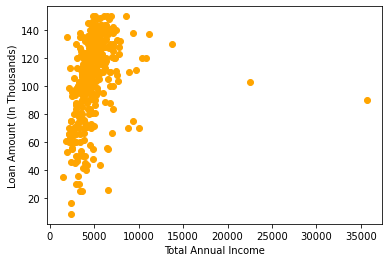

In [10]:
# take only two variables from the data – “LoanAmount” and “Total Income”.
# And observe the relationship between these two numerical variables by visualizing the data points using scatter plot.
X = data[["LoanAmount","Total Income"]]
print(X.head())
plt.scatter(X["Total Income"],X["LoanAmount"],c='orange')
plt.xlabel('Total Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Explore the dataset and the characteristics of the data

In [11]:
print(X.describe()['Total Income'])
print("\n",X.describe()['LoanAmount'])

count      381.000000
mean      4857.120525
std       2417.069533
min       1442.000000
25%       3664.000000
50%       4600.000000
75%       5500.000000
max      35673.000000
Name: Total Income, dtype: float64

 count    381.000000
mean     104.986877
std       28.358464
min        9.000000
25%       90.000000
50%      110.000000
75%      127.000000
max      150.000000
Name: LoanAmount, dtype: float64


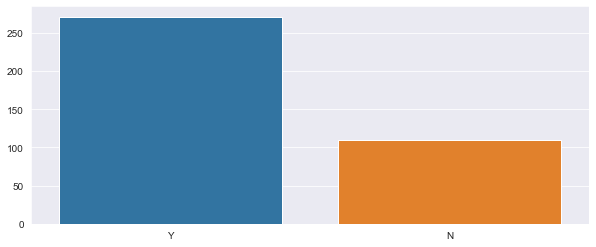

In [12]:
l_status = data.Loan_Status.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=l_status.index, y=l_status.values)
plt.show()

## Bar plot to check the distribution of 'yes' and 'no' for loan eligibility status. Maximum population clearly outweighs on 'yes' and are eligible for loan.

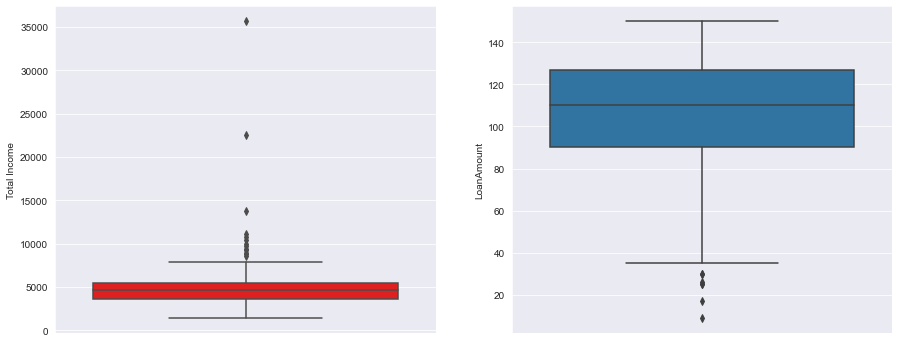

In [13]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=X["Total Income"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=X["LoanAmount"])
plt.show()

## The above two box plots of 'total income' and 'loan amount' helps us to better visualize the distribution range. The range of loan amount is clearly more than the applicant income range. We can also see the outliers or the noisy data.

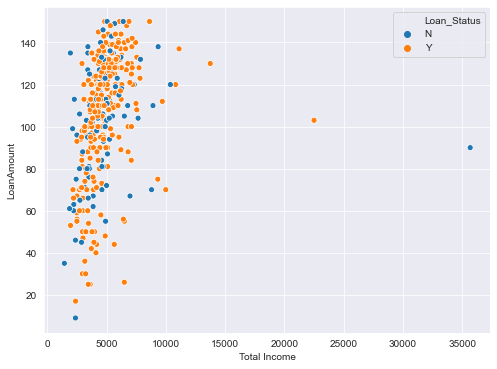

In [14]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(data=data,x='Total Income',y='LoanAmount',hue='Loan_Status') #Loan eligibility

## From the above plot you can analyze the data using color that corresponds to a categorical variable 'Loan_Status'.

# I.   K-Means algorithm

## Step 1: Choose number of cluster 'K'

## Step 2: Randomly select K data points(centroids) for cluster representation.

     LoanAmount  Total Income
317       113.0        4328.0
210       117.0        6177.0
328        95.0        3400.0


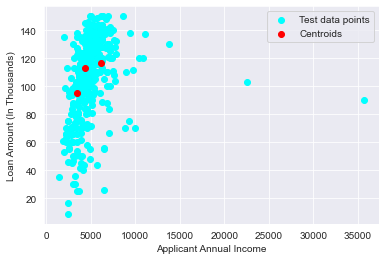

In [15]:
# To divide data points into groups based on how closely sets of points cluster together, we will use k-means algorithm.
# Suppose (number of clusters)k=3 i.e. pick 3 clusters and then select random observations from the data as the centroids.
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
print(Centroids)
d=plt.scatter(X["Total Income"],X["LoanAmount"],c='cyan')
c=plt.scatter(Centroids["Total Income"],Centroids["LoanAmount"],c='red')
plt.xlabel('Applicant Annual Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.legend(handles = [d, c],labels  = ['Test data points', 'Centroids'])
plt.show()

### You can notice that on each run, three different data points known as cluster centers/means are selected from the training data for each cluster to start with.

## Step 3:  Assign evry point from the test data to one of the K cluster means based on the                    distance from the centroid.
## Step 4 - Recompute the centroids of newly formed clusters.
## Step 5 - Repeat step 3 and 4 until no new centroid is assigned to the K clusters.

In [16]:
# Next step will be to assign every point in the training data to it's nearest mean which are the cluster representatives. 
# The assignment is based on the simmilarity/dissimilarity measures or distance.
from warnings import filterwarnings
filterwarnings('ignore')
diff = 1
j=0
while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Total Income"]-row_d["Total Income"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","Total Income"]]
    print("\nRecomputed means=\n",Centroids_new)
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['Total Income'] - Centroids['Total Income']).sum()
        print("Total difference between the new and old K centroids = ",diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","Total Income"]]  


Recomputed means=
          LoanAmount  Total Income
Cluster                          
1        109.493056   4580.430556
2        120.060345   6950.620690
3         85.173554   3179.412562

Recomputed means=
          LoanAmount  Total Income
Cluster                          
1        112.893258   4785.320225
2        118.645570   7625.949367
3         84.935484   3196.176774
Total difference between the new and old K centroids =  898.7299166253666

Recomputed means=
          LoanAmount  Total Income
Cluster                          
1        115.738220   4961.680628
2        115.350877   8265.438596
3         85.105263   3246.255038
Total difference between the new and old K centroids =  865.6479446903853

Recomputed means=
          LoanAmount  Total Income
Cluster                          
1        115.551724   5089.403941
2        116.658537   9010.829268
3         85.839416   3269.853431
Total difference between the new and old K centroids =  898.5676940168703

Recomputed means=

# Clusters represented by the selected centroids after meeting the stopping      criterion.

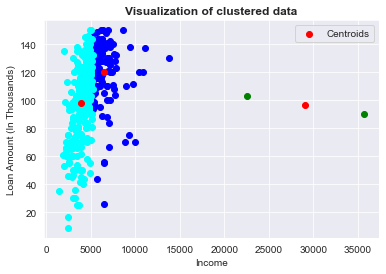

In [19]:
color=['blue','green','cyan','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Total Income"],data["LoanAmount"],c=color[k])
c=plt.scatter(Centroids["Total Income"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.title('Visualization of clustered data', fontweight='bold')
plt.legend(handles = [c],labels  = ['Centroids'])
plt.show()

## It can be noticed that the two outliers in that test data have shifted one of the    mean/centroid towards itself, this is because mean is not robust to outliers.

## Therefore, we will impliment the K-means clustering again without the outliers, to see how the clusters are formed then.

# -----------------------------------------------------------------------------------------------------------
# II.                                        K-means algorithm

In [52]:
# Load the data from columns "ApplicantIncome" and "loanAmount"
Y = data.iloc[:, [6, 8]].values
Y[10:20]

array([[3596.,  100.],
       [3510.,   76.],
       [4887.,  133.],
       [2600.,  115.],
       [7660.,  104.],
       [2600.,  116.],
       [3365.,  112.],
       [2799.,  122.],
       [4226.,  110.],
       [1442.,   35.]])

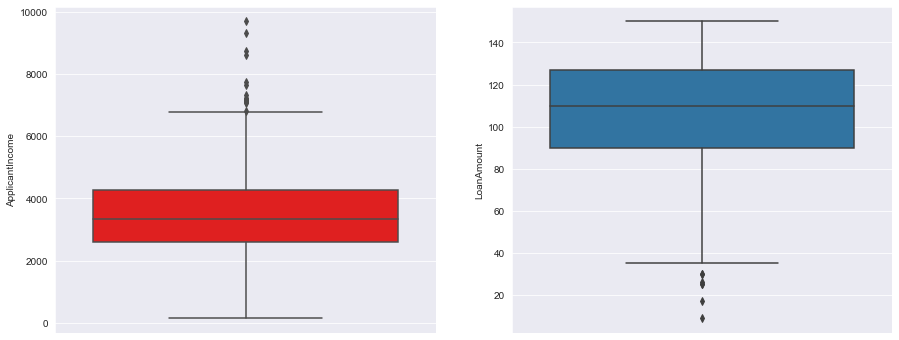

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=data["ApplicantIncome"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=data["LoanAmount"])
plt.show()

## The above two box plots of 'ApplicantIncome' and 'LoanAmount' helps us to better visualize the distribution range. The range of loan amount is clearly more than the applicant income range. 

In [54]:
m=Y.shape[0]
print("Number of training examples in the test data = ",m)
n=Y.shape[1] 
print("\nNumber of features in the test data = ",n)
n_iter=100
K=3

Number of training examples in the test data =  381

Number of features in the test data =  2


In [56]:
Centroids=np.array([]).reshape(n,0) #Initialize nxK dimensional matrix 'Centroids'.

In [57]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,Y[rand]]
for k in Centroids:
    print(k)
Output={}

[2698. 4691. 4000.]
[122. 100. 140.]


## Here, each column represents centroid for a cluster. Like, (2698,122) is the centroid for      first cluster.

## Find the euclidian distance for every test data point from the centroid and assign the          cluster based on the minimal distance.

In [58]:
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
    tempDist=np.sum((Y-Centroids[:,k])**2,axis=1)
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C_index=np.argmin(EuclidianDistance,axis=1)+1

## After clustering all data points based on the clustered index 'C_index' and store in the 'Output' dictionary.
## Recompute the mean of K clusters and update it as new centroids. Y is a temporary dictionary which stores the solution for one particular iteration.

In [59]:
Z={}
for k in range(K):
    Z[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Z[C[i]]=np.c_[Z[C[i]],Y[i]]
for k in range(K):
    Z[k+1]=Z[k+1].T
for k in range(K):
     Centroids[:,k]=np.mean(Z[k+1],axis=0)

## We will keep updating the centroids for each cluster until n_iter = 100.

In [60]:
for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((Y-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C_index=np.argmin(EuclidianDistance,axis=1)+1
    Z={}
    for k in range(K):
        Z[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Z[C_index[i]]=np.c_[Z[C_index[i]],Y[i]]
    for k in range(K):
        Z[k+1]=Z[k+1].T
    for k in range(K):
        Centroids[:,k]=np.mean(Z[k+1],axis=0)
    Output=Z

## Visualization of unclustered test data.

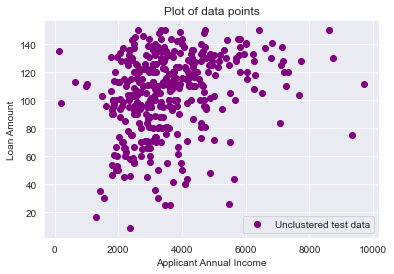

In [61]:
# take only two variables from the data – “LoanAmount” and “ApplicantIncome”.
# And observe the relationship between these two numerical variables by visualizing the data points using scatter plot.
plt.scatter(Y[:,0],Y[:,1],c='purple',label='Unclustered test data')
plt.xlabel('Applicant Annual Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.title('Plot of data points')
plt.show()

# Plot the clustered data after meeting the stopping criterion.

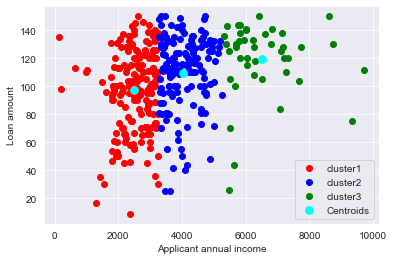

In [63]:
color=['red','blue','green']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=59,c='cyan',label='Centroids')
plt.xlabel('Applicant annual income')
plt.ylabel('Loan amount')
plt.legend()
plt.show()

# It can be noticed that due to absence of outliers/extreme values, centroids have clustered the data into 3 visually concise clusters.

## 1. Applicants with high annual income rarely avails less amount of loans, mostly loan              amount ranges between 100-140 (thousands). (CLUSTER-3)

## 2. Maximum applicants avails loan of amount between 90-140 (thousands).

## 3. Applicants with income 4000-5000 rupees avails loan of amount 100-140 (thousands).

# -----------------------------------------------------------------------------------------------------------